#Maryuri Pomeo
#Analisis de datos
#Dataset Regresión Logistica Heart Disease Cleveland UCI
#Contiene información de pacientes.
#(edad, sexo, presión, sanguínea, colesterol, etc. la variable objetivo es la presenci de enfermedad cardía).

#1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.a.c..


In [155]:
#1. Realizar un análisis exploratorio de los datos para identificar
#relaciones entre variables, valores atípicos, tendencias, etc.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [157]:
#Cargar las librerias necesrias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import seaborn as sns



In [159]:
# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression # Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, f1_score, recall_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import itertools

In [161]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('C:/heart_cleveland_upload.csv')

In [163]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [164]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en columna thalach')

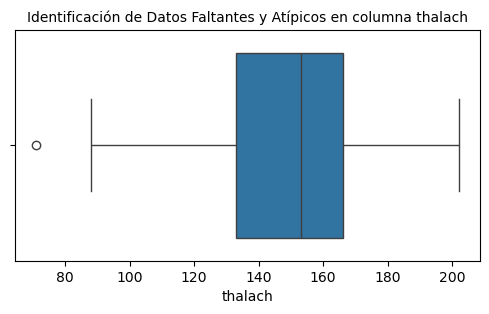

In [166]:
# Identificación de valores atípicos en el dataset
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos en columna thalach', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en columna age')

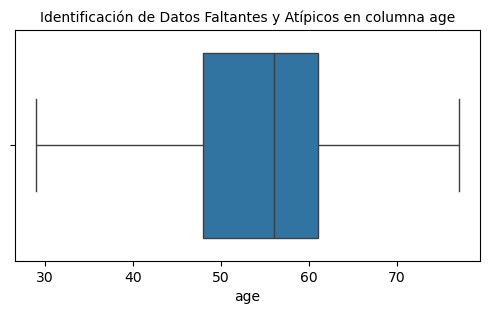

In [168]:
# Identificación de valores atípicos en el dataset
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['age'])
plt.title('Identificación de Datos Faltantes y Atípicos en columna age', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en columna sex')

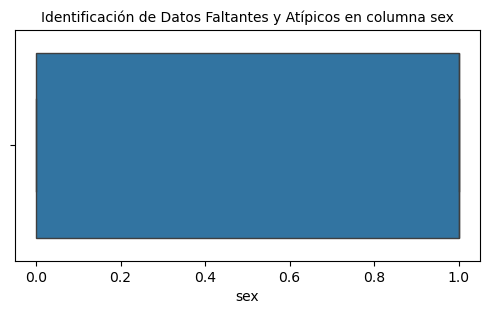

In [169]:
# Identificación de valores atípicos en el dataset
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['sex'])
plt.title('Identificación de Datos Faltantes y Atípicos en columna sex', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en columna cp')

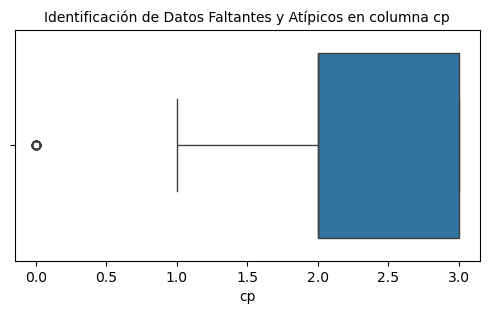

In [171]:
# Identificación de valores atípicos en el dataset
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificación de Datos Faltantes y Atípicos en columna cp', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en columna trestbps')

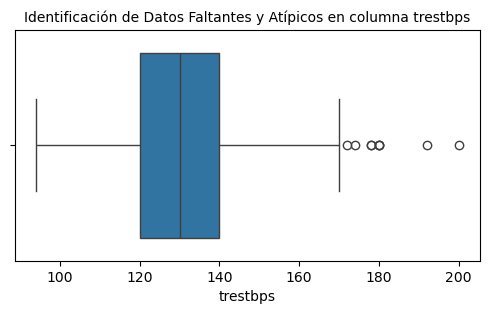

In [172]:
# Identificación de valores atípicos en el dataset
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos en columna trestbps', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en columna chol')

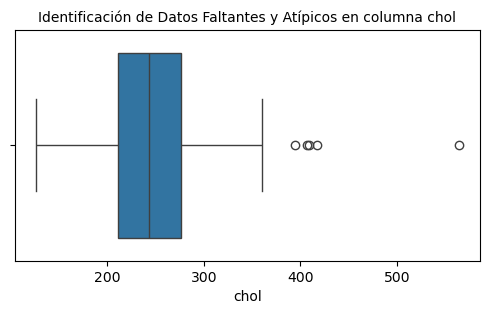

In [173]:
# Identificación de valores atípicos en el dataset
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos en columna chol', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en columna fbs')

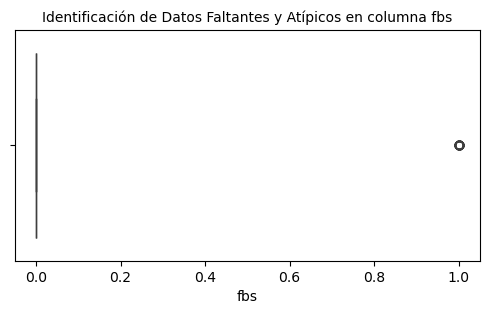

In [176]:
# Identificación de valores atípicos en el dataset
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['fbs'])
plt.title('Identificación de Datos Faltantes y Atípicos en columna fbs', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en columna restecg')

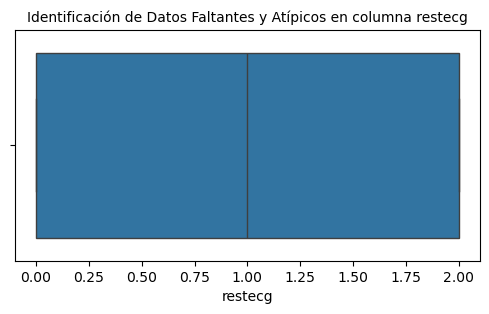

In [177]:
# Identificación de valores atípicos en el dataset
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['restecg'])
plt.title('Identificación de Datos Faltantes y Atípicos en columna restecg', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en columna exang')

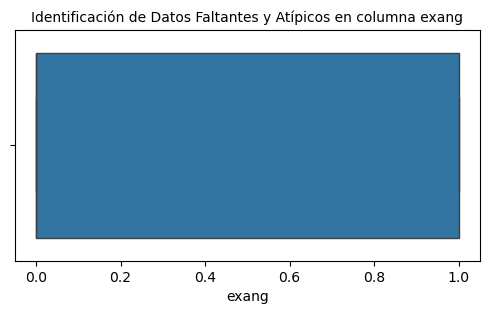

In [178]:
# Identificación de valores atípicos en el dataset
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['exang'])
plt.title('Identificación de Datos Faltantes y Atípicos en columna exang', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en columna oldpeak')

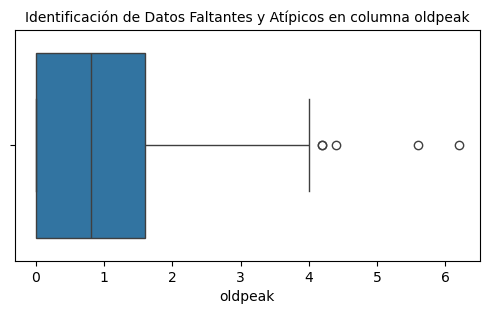

In [181]:
# Identificación de valores atípicos en el dataset
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos en columna oldpeak', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en columna slope')

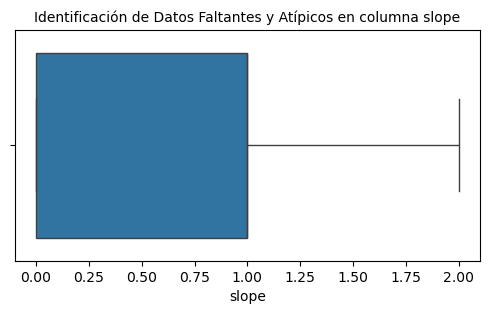

In [182]:
# Identificación de valores atípicos en el dataset
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['slope'])
plt.title('Identificación de Datos Faltantes y Atípicos en columna slope', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en columna ca')

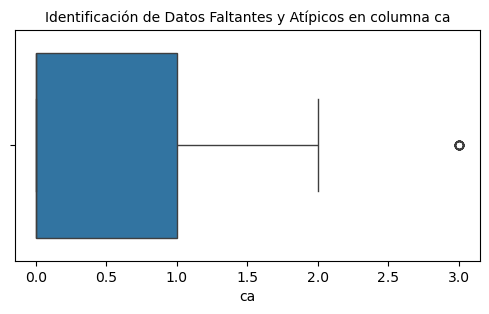

In [183]:
# Identificación de valores atípicos en el dataset
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['ca'])
plt.title('Identificación de Datos Faltantes y Atípicos en columna ca', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en columna thal')

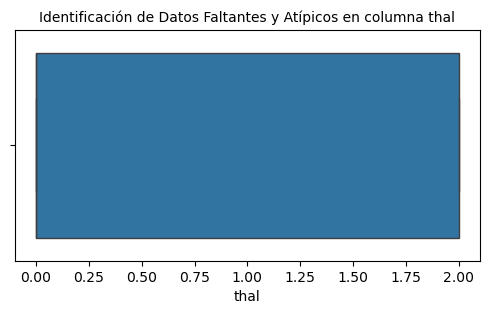

In [185]:
# Identificación de valores atípicos en el dataset
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thal'])
plt.title('Identificación de Datos Faltantes y Atípicos en columna thal', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en columna condition')

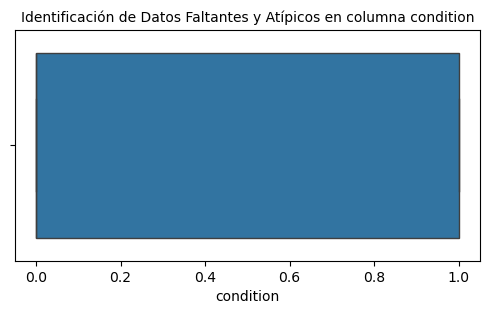

In [186]:
# Identificación de valores atípicos en el dataset
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['condition'])
plt.title('Identificación de Datos Faltantes y Atípicos en columna condition', fontsize=10 )

#2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.


In [188]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [189]:
# Revisión de datos Faltantes

print("Cantidad de registros con cero en la columna oldpeak: ",Datos['oldpeak'].isin([0]).sum())

Cantidad de registros con cero en la columna oldpeak:  96


In [191]:
#Remplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())

In [193]:
# Revisión nuevamente de datos Faltantes

print("Cantidad de registros con cero en la columna oldpeak: ",Datos['oldpeak'].isin([0]).sum())

Cantidad de registros con cero en la columna oldpeak:  0


In [194]:
#Revisión del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Característica de interes:

-Enfermedad cardiaca: si la persona tiene enfermedad cardíaca o no (0 = sin enfermedad / 1= con enfermedad)
-Predecir si una persona puede tener enfermedad cardiaca

In [200]:
# Total de personas con enfermedad cardiaca

Datos['condition'].value_counts()


condition
0    160
1    137
Name: count, dtype: int64

In [201]:
Datos[['condition']].head(40)
       

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


# 4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [204]:
# Porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25%
# Se crean vaiables train y test para almacenar la información del almacenamiento.
X = Datos.drop('condition',axis=1) # se cargan los datos de train, sin la columna condition
Y = Datos['condition']# se cargan los datos del test, con la columna condition

# Dividir el dataset en dos columnas entrenamiento y prueba (train y test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [207]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
159   68    1   3       144   193    1        0      141      0  3.400000   
90    62    1   2       130   231    0        0      146      0  1.800000   
269   48    1   3       130   256    1        2      150      1  1.055556   
157   70    1   3       145   174    0        0      125      1  2.600000   
198   60    1   3       130   206    0        2      132      1  2.400000   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
251   53    0   3       130   264    0        2      143      0  0.400000   
192   61    1   3       120   260    0        0      140      1  3.600000   
117   52    1   2       172   199    1        0      162      0  0.500000   
47    52    1   1       134   201    0        0      158      0  0.800000   
172   65    1   3       120   177    0        0      140      0  0.400000   

     slope  ca  thal  
159      1   2     2  
90       1   3     2  
269   

In [209]:
print (Y_test)

111    0
150    0
12     1
216    1
139    0
      ..
27     0
218    0
256    0
37     0
92     0
Name: condition, Length: 75, dtype: int64


# 5.Entrenar el modelo configurando los diferentes hiperparámetros.

In [212]:
# Construir el modelo de regresión logistica
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)

# crea el modelo de predicción
prediccion = modelo_regresion.predict(X_test) #predecirnlos valores apartir del conjunto de datosde validación

In [213]:
print (Y_test)

111    0
150    0
12     1
216    1
139    0
      ..
27     0
218    0
256    0
37     0
92     0
Name: condition, Length: 75, dtype: int64


In [214]:
print (prediccion)

[0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0
 0]


6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [216]:
# Desempeño de modelo de regresión

print(classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        34
           1       0.94      0.80      0.87        41

    accuracy                           0.87        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.88      0.87      0.87        75



# 7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

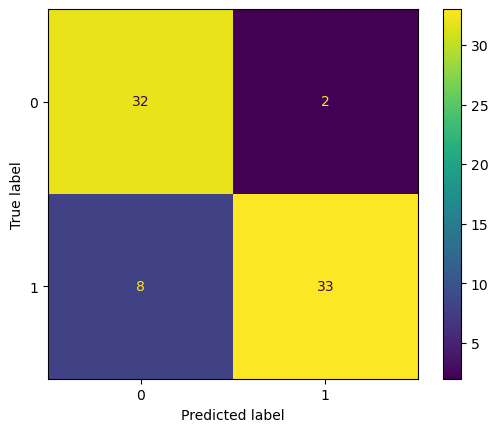

In [225]:
cm=confusion_matrix(Y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

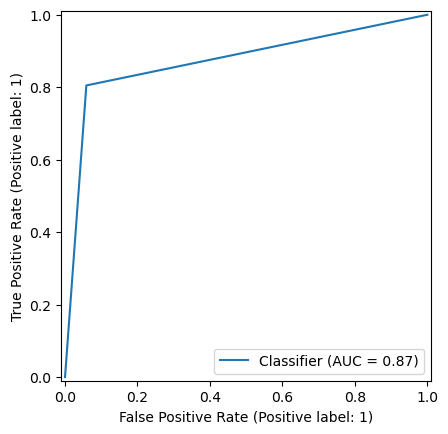

In [226]:
# Curva de precisión del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, prediccion)
plt.show()

## Se realizo la ejecución del modelo de precisión el cual permitio identificar los siguientes hallazgos:

 -Precisión: En la precisión se pudo identificar que la clase "condition" es 0.80 lo que significa que el 80% de las personas no tienen una enfermedad cardiaca.

 -Recall: Aqui el Recall para la clase "condition es 0.94, lo que indica que el modelo identifico corectamente al 94% de todos los enfermos.

 -F1 Score: Nos permitio identificar Para la clase "condition" 0.87, lo que indica un equilibrio entre precision y Recall

## De la Matriz de confusion podemos interpretar.


-Se encontraron valores verdaderos positivos donde se predijo corectamente que 32 personas no tienen una enfermedad cardiaca.
 -Se encontraron valores verdaderos negativos donde se predijo corectamente 33 registros de personas que si tienen una enfermedad cardiaca, cuando en realidad si la tienen.
 -Se encontraton Falsos positivos donde se predijo incorrectamente como verdadero 8 personas no que tenian una enfermedad cardiaca, cuando en realidad si la tenian.
 -Se encontraron Falsos negativo donde se predijo incorrectamente como falso 2 personas que tienen una enfermedad cardiaca; pero en realidad no la tienen.

## De la curva de precisión del modelo se puede interpretar
 AUC 0.87 que significa que el 87% de las predicciones del clasificador son corectas en todos los umbralet de clasificación